#  Real Estate Price Prediction - using Advanced Linear Regression Techniques

## Overview

There are several factors that influence the price a buyer is willing to pay for a house. Some are apparent and obvious and some are not. Nevertheless, a rational approach facilitated by machine learning can be very useful in predicting the house price. A large data set with 79 different features (like living area, number of rooms, location etc) along with their prices are provided for residential homes in Ames, Iowa. The challenge is to learn a relationship between the important features and the price and use it to predict the prices of a new set of houses.


Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Statistical Summary](#Statistical_Summary)
    - 3.2 - [Spliting Target Variable](#Spliting_Target_Variable)
    - 3.3 - [Feature Engineering](#Feature_Engineering)
    - 3.4 - [Split dataframe into numeric and categorical](#Split_dataframe)
    - 3.5 - [Reduce Skewness for Numeric Features](#Reduce_Skewness)
    - 3.6 - [Mean Normalization](#Mean_Normalization)
4. **[Missing Data Analysis](#treat_missing_values)**
5. **[Missing Data Treatment](#Missing_Data_Treatment)**
    - 5.1 - [Handling Missing Values in Numerical Columns](#Handling_Numerical_Columns)
    - 5.2 - [Handling Missing Values in Categorical Columns](#Handling_Categorical_Columns)
6. **[Dummy Coding](#dummy_coding)**
7. **[Exploratory Data Analysis](#exploratory_data_analysis)**
    - 7.1 - [Correlation](#Correlation)
    - 7.2 - [Correlation Plot](#correlation_plot)
8. **[Linear Regression Modeling](#modeling)**
    - 8.1 - [Preparation of datasets](#preparation_of_datasets)
  

<a id='import_packages'></a>
# 1. Import Packages

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os
#os.chdir('D:\\class notes\\ML\\train.csv')

<a id='load_data'></a>
# 2. Load data
Read the House Price Dataset using pandas.read_csv function into an object(data)

In [ ]:
data = pd.read_csv("D:\\class notes\\ML\\train.csv")

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id='data_preparation'></a>
# 3. Data Preparation
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. Here we first analyze the data statistically and then split the target varibles and normalize, followed by splitting the dataframe into numerical and categorical features.

In [ ]:
# checking data types for variables in HousePrice dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Checking data size
data.shape

(1460, 81)

<a id='Statistical_Summary'></a>
# 3.1 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables and count, unique, top, freq for categorical variables.

In [ ]:
# dataframe with categorical features
data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# dataframe with numerical features
data.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<a id='Spliting_Target'></a>
# 3.2 Spliting Target Variable
Here the Target Variable is separated from data and the distribution is checked.

In [ ]:
target = data['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

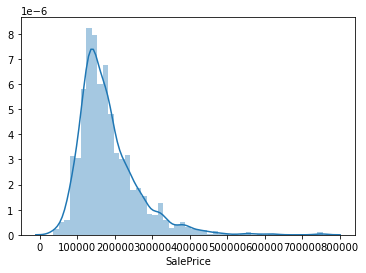

In [ ]:
# Visualizing the distribution of Salesprice(Dependent) variable 
import seaborn as sns
sns.distplot(target,hist=True)

As we can see the distribution is left skewed, so in order to make it normally distributed, we need to use log transformation.

In [ ]:
# Log transformation
import numpy as np
target_log  = np.log(target)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEF32AE730>,
      dtype=object)

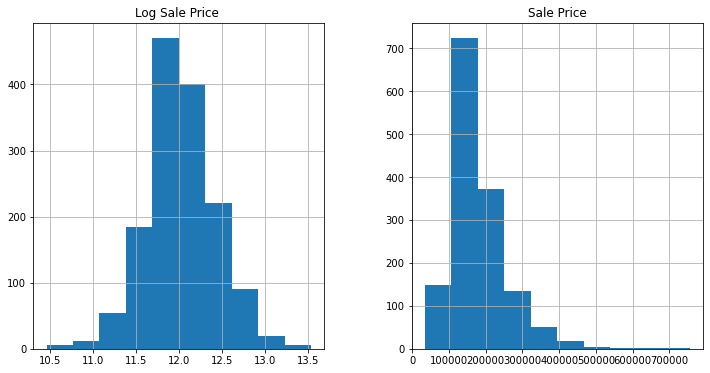

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Sale Price":data["SalePrice"],"Log Sale Price ":target_log})
prices.hist()

After using log transformation, the Target variable is normally distributed.

In [ ]:
# drop target variable from dataset
raw_data = data
data = data.drop(["SalePrice"], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


<a id='Features_Engineering'></a>
# 3.3 Feature Engineering

In [ ]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [ ]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
data = data.drop(["TotalBsmtSF"], axis=1)
data = data.drop(["1stFlrSF"], axis=1)
data = data.drop(["2ndFlrSF"], axis=1)
data = data.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3343


<a id='Split_dataframe'></a>
# 3.4 Split Dataframe into numeric and categorical
Split dataframe into 2 with:

* categorical features
* numerical features

In [ ]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [ ]:
# Using describe function in numeric dataframe 
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2567.048630
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,821.714421
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.500000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2474.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3004.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,11752.000000


In [ ]:
# Printing 5 head observation in categorical dataframe
data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


# 3.5 Reduce Skewness for Numeric Features

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Here we are interested in the variables which have skewness more than 0.75


![](https://www.managedfuturesinvesting.com/images/default-source/default-album/skewness---mean-median-mode.jpg?sfvrsn=0)

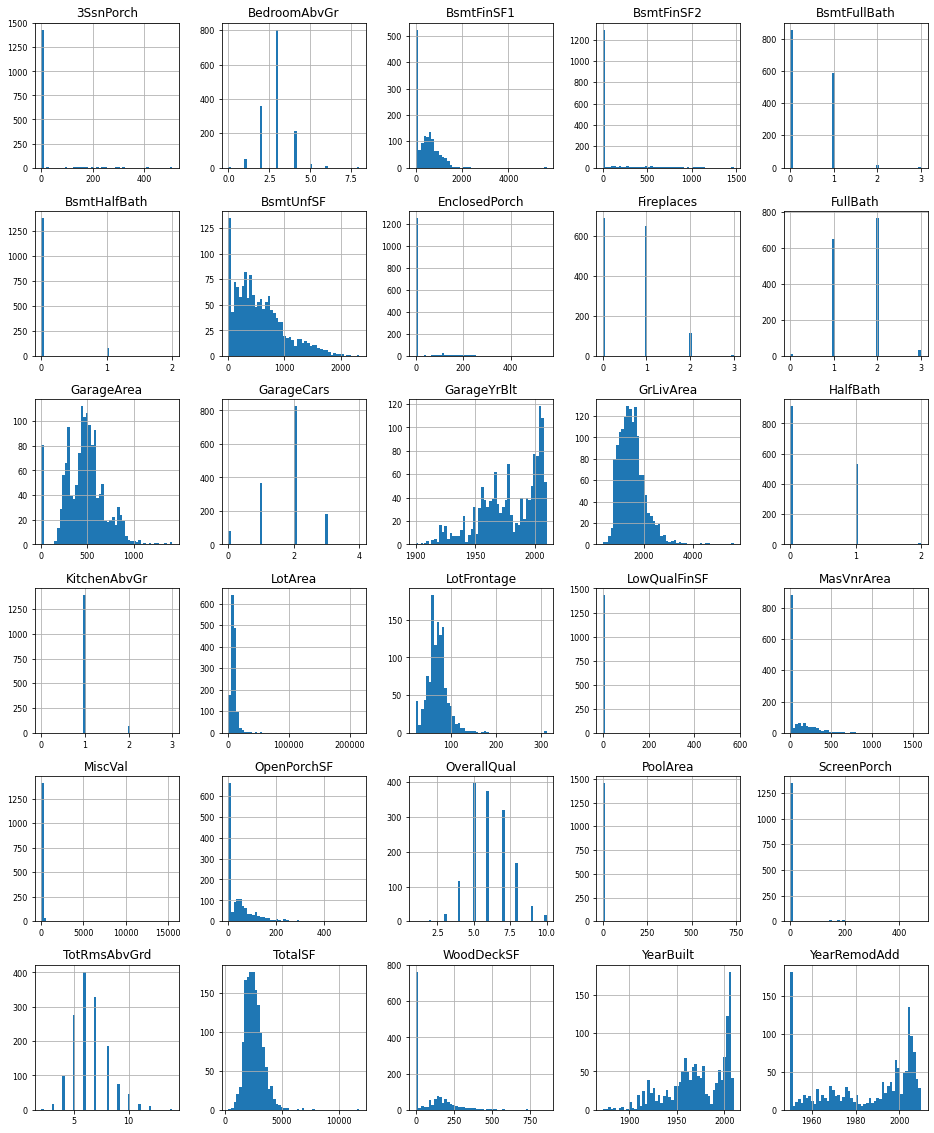

In [ ]:
data_num.hist(figsize=(16, 20), 
              bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [ ]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

In [ ]:
# List of variables has skewness more than 0.75
data_num_skew

LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
TotalSF           1.774874
dtype: float64

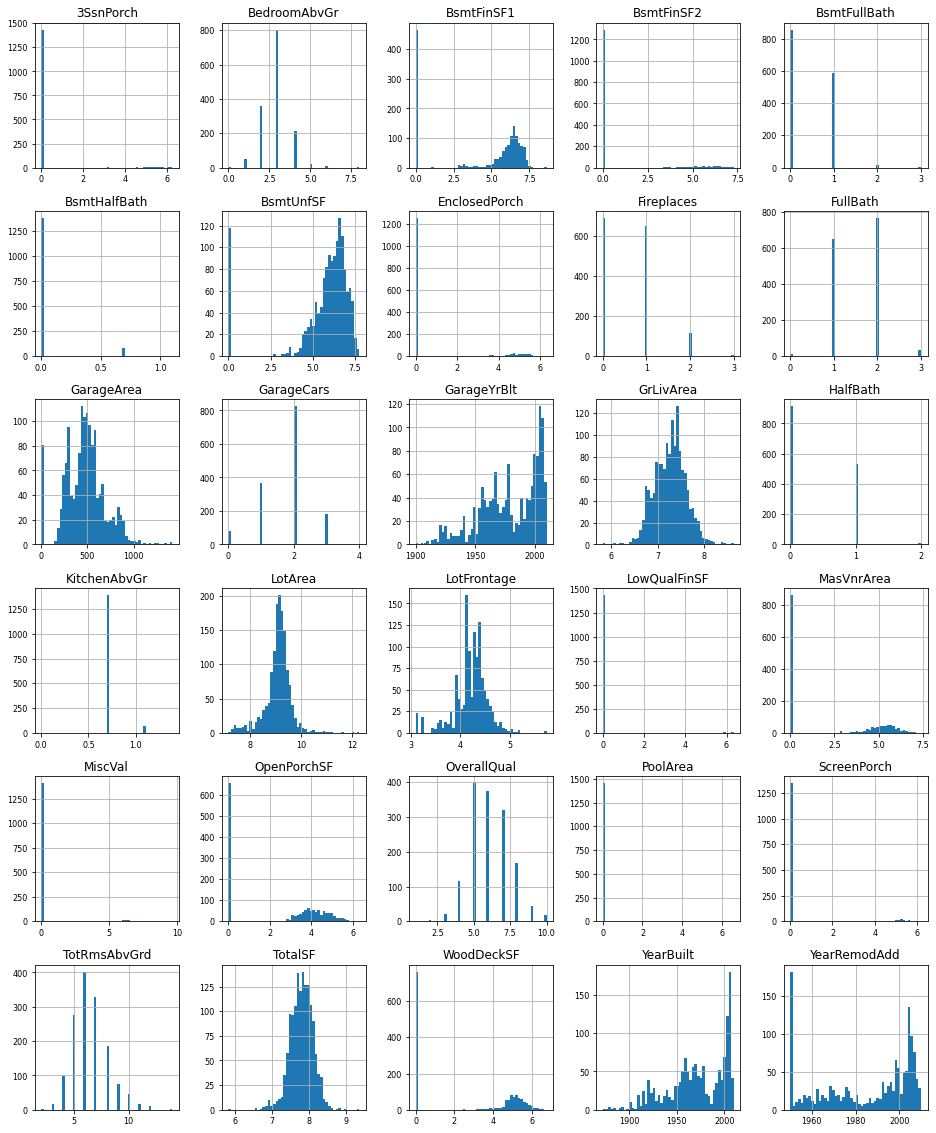

In [ ]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

<a id='mean_normalization'></a>
# 3.6 Mean Normalization

In [ ]:
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.494947e-15,4.984835e-16,1.946692e-17,2.267735e-16,1.541119e-15,-2.879545e-16,4.277020e-16,1.277517e-17,5.977049e-16,-2.756072e-17,...,7.551037e-17,-6.957905e-18,4.643166e-16,-4.462564e-16,6.616663e-17,-1.454791e-17,1.127333e-17,-7.648467e-17,2.399622e-17,-1.981462e-15
std,1.302418e-01,1.012732e-01,1.536663e-01,2.188616e-01,3.440901e-01,3.566180e-01,3.463615e-01,2.528701e-01,2.390241e-01,1.176771e-01,...,1.868288e-01,1.507792e-01,3.843948e-01,3.413088e-01,2.735105e-01,1.070007e-01,2.272059e-01,6.641407e-02,1.270673e-01,8.809425e-02
min,-4.198342e-01,-3.797634e-01,-5.665906e-01,-7.193319e-01,-5.810959e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-7.282006e-01,-1.571654e-02,...,-4.417808e-01,-3.335544e-01,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.589950e-01
25%,-4.241893e-02,-3.544346e-02,-1.221461e-01,-1.251290e-01,-2.977626e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-3.051994e-02,-1.571654e-02,...,-1.917808e-01,-9.765877e-02,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.530119e-02
50%,1.556841e-02,8.988780e-03,-1.103501e-02,1.255211e-02,1.522374e-01,-2.889448e-01,1.993641e-01,-8.982469e-02,6.733259e-02,-1.571654e-02,...,5.821918e-02,4.950538e-03,-3.637825e-01,1.505731e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,3.122795e-03
75%,7.047235e-02,4.854699e-02,1.000761e-01,2.082043e-01,3.189041e-01,4.047022e-01,2.708912e-01,-8.982469e-02,1.350357e-01,-1.571654e-02,...,5.821918e-02,7.265153e-02,3.956845e-01,3.053412e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,5.766237e-02
max,5.801658e-01,6.202366e-01,4.334094e-01,2.806681e-01,4.189041e-01,7.110552e-01,5.103642e-01,9.101753e-01,2.717994e-01,9.842835e-01,...,5.582192e-01,6.664456e-01,6.362175e-01,6.339296e-01,8.894728e-01,9.862528e-01,9.335038e-01,9.953929e-01,9.758043e-01,4.410050e-01


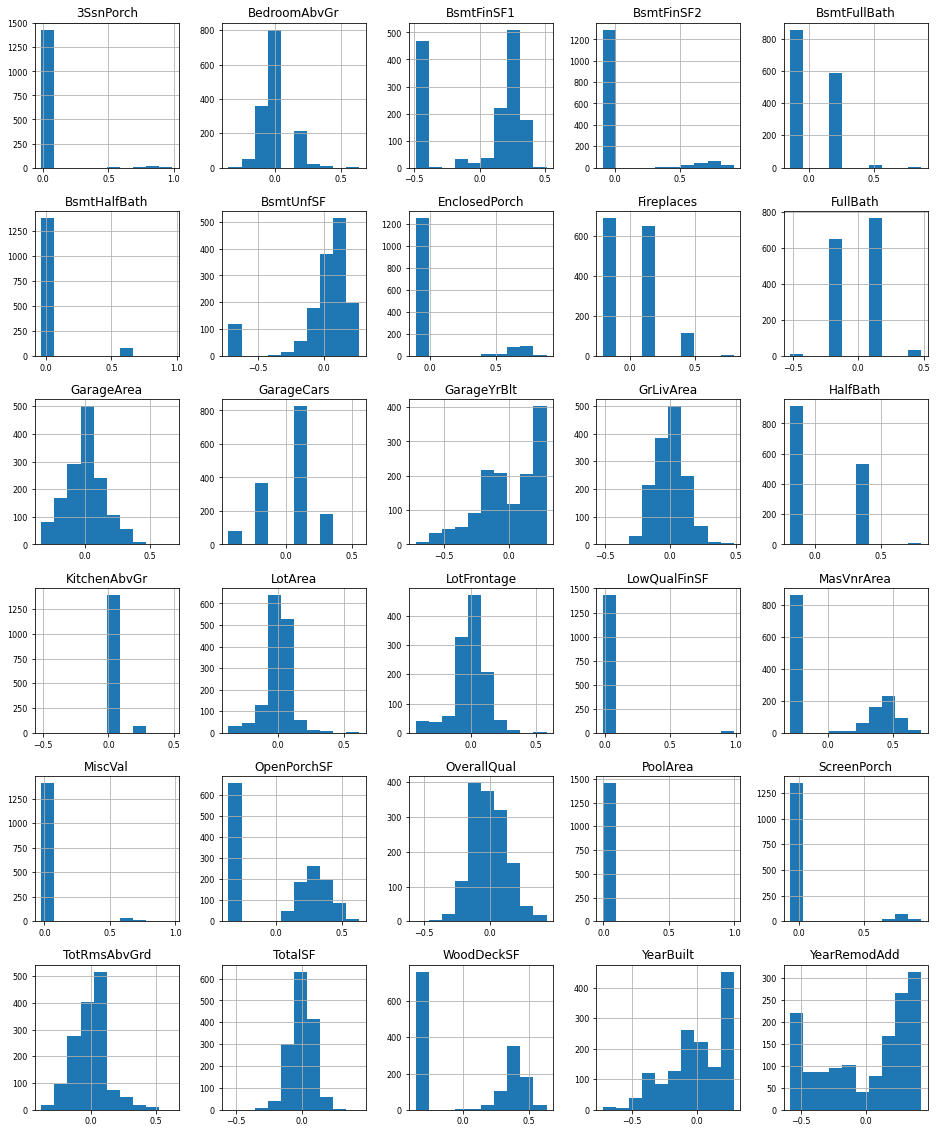

In [ ]:
data_num.hist(figsize=(16, 20),xlabelsize=8, ylabelsize=8);

After Mean Normalization the data scale will change and it will not affect original data distribution 

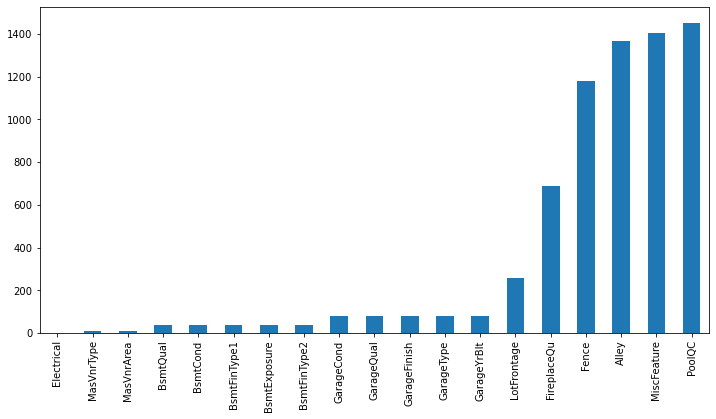

In [ ]:
# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()

In [ ]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


<a id='Missing_Data_Treatment'></a>
# 5. Missing Data Treatment
We may leave the data as it is or do data imputation to replace them. Suppose the number of cases of missing values is extremely small; then we may drop or omit those values from the analysis. In statistical language, if the number of the cases is less than 5% of the sample, then we can drop them.

If there is a larger number of missing values, then it is better to drop those cases (rather than do imputation) and replace them.

# 5.1 Handling Missing Values in Numerical Columns
Here we do data imputation. If the number of missing values is more than 260, we drop those values from the analysis.

In [ ]:
data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())

# 5.2 Handling Missing Values in Categorical Columns
Here we do data imputation. If the number of missing values is more than 50, we drop the column from the analysis.

In [ ]:
    data_len = data_cat.shape[0]

    # check what is percentage of missing values in categorical dataframe
    for col in data_cat.columns.values:
        missing_values = data_cat[col].isnull().sum()
        #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 

        # drop column if there is more than 50 missing values
        if missing_values > 50:
            print("droping column: {}".format(col))
            data_cat.drop(col, axis = 1)
        # if there is less than 50 missing values than fill in with median valu of column
        else:
            #print("filling missing values with XXX: {}".format(col))
            #data_cat = data_cat.fillna('XXX')
            pass

droping column: Alley
droping column: FireplaceQu
droping column: GarageType
droping column: GarageFinish
droping column: GarageQual
droping column: GarageCond
droping column: PoolQC
droping column: Fence
droping column: MiscFeature


In [ ]:
data_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


<a id='dummy_coding'></a>
# 6. Dummy Coding for Categorical Variables
Dummy coding is a way of incorporating nominal variables into regression analysis. It allows us to turn categories into something a regression can treat as having a high (1) and low (0) score. Any binary variable can be thought of as having directionality, because if it is higher, it is category 1, but if it is lower, it is category 0. This allows the regression look at directionality by comparing two sides, rather than expecting each unit to correspond with some kind of increase.

data_cat.columns

In [ ]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [ ]:
# Viewing dimensionality of the DataFrame.
data_cat_dummies

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,

In [ ]:
pd.set_option('display.max_columns',500)

In [ ]:
print("Numerical features : " + str(len(data_num.columns)))
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Numerical features : 30
Categorical features : 246


In [ ]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)

In [ ]:
newdata.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=276)

# 7. Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


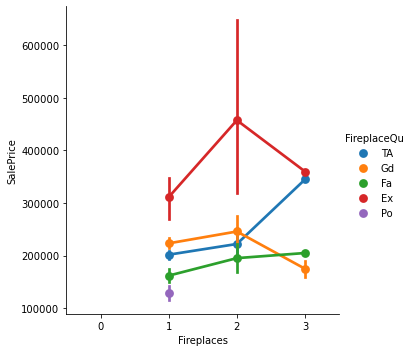

In [ ]:
sns.factorplot("Fireplaces","SalePrice",data=raw_data,hue="FireplaceQu");

If there are two fireplaces, the Sales Price increases.
Also, if there are fireplace of Excellent quality in the house the Sales Price increases.

In [ ]:
# If fireplace is missing that means that house doesn't have a FireplaceQu
FireplaceQu = raw_data["FireplaceQu"].fillna('None')
pd.crosstab(raw_data.Fireplaces, raw_data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


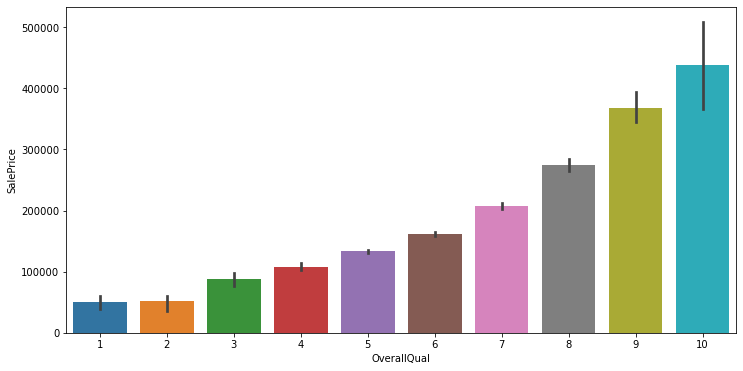

In [ ]:
sns.barplot(raw_data.OverallQual,raw_data.SalePrice)

As we can see, the Sales Price increases with the increase in Overall Quality.

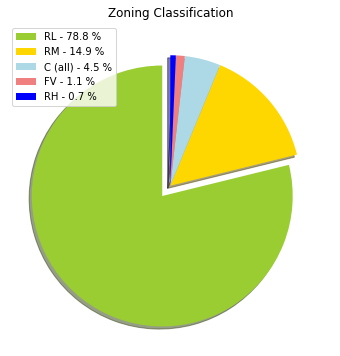

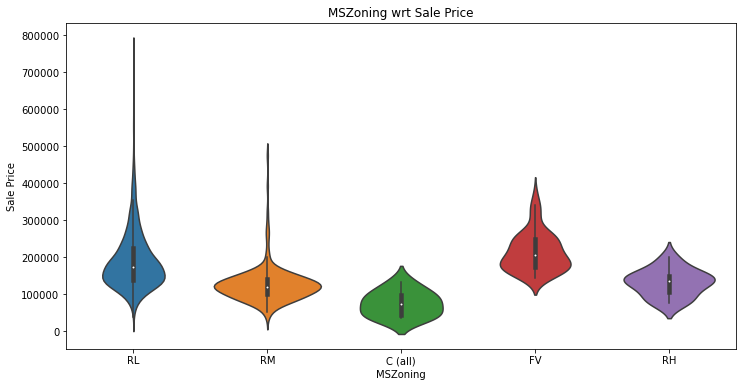

In [ ]:
# MSZoning
labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

sns.violinplot(raw_data.MSZoning,raw_data["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

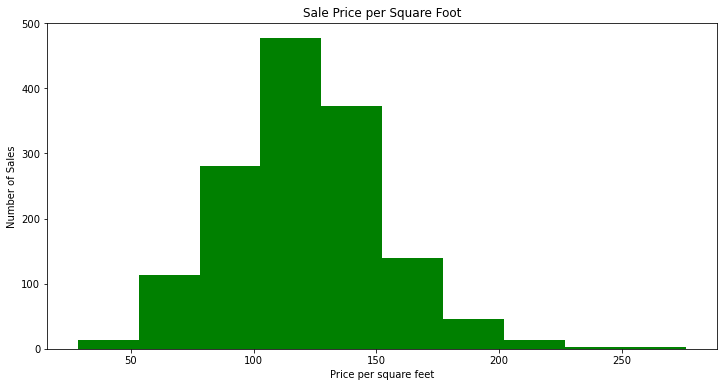

In [ ]:
# SalePrice per Square Foot
SalePriceSF = raw_data['SalePrice']/raw_data['GrLivArea']
plt.hist(SalePriceSF, color="green")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

Most of the sales happend in 100 to 150 square feet

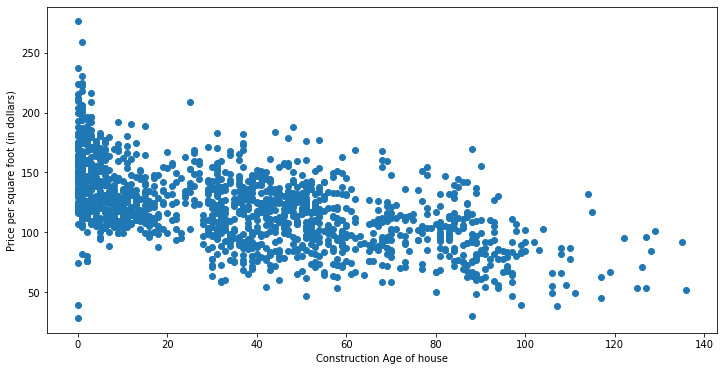

In [ ]:
ConstructionAge = raw_data['YrSold'] - raw_data['YearBuilt']
plt.scatter(ConstructionAge, SalePriceSF)
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

From the above representation, price of house goes down with its age.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


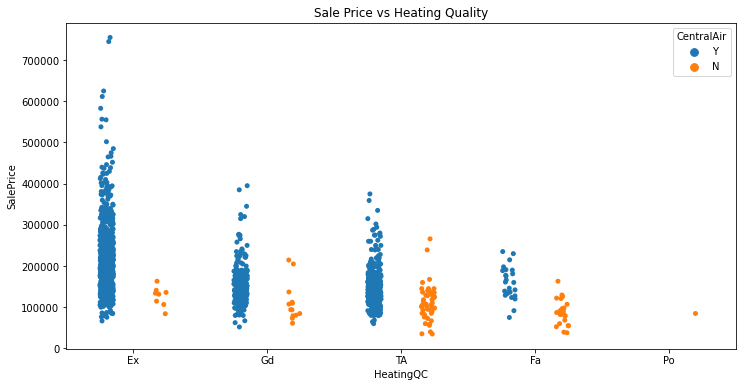

In [ ]:
# Heating and AC arrangements
sns.stripplot(x="HeatingQC", y="SalePrice",data=raw_data,hue='CentralAir',jitter=True,split=True)
plt.title("Sale Price vs Heating Quality");

Having AC definitely escalates price of house.

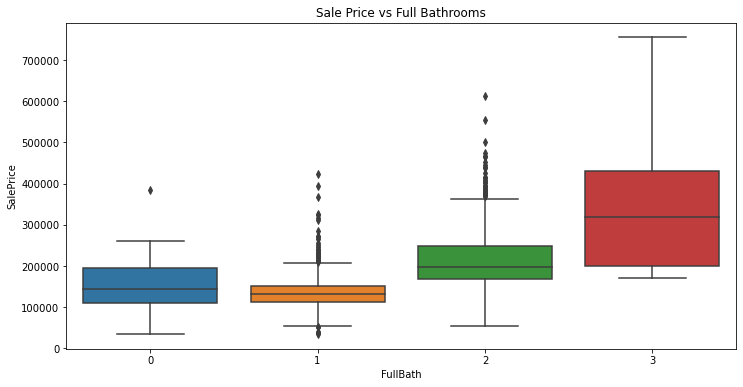

In [ ]:
sns.boxplot(raw_data["FullBath"],raw_data["SalePrice"])
plt.title("Sale Price vs Full Bathrooms");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


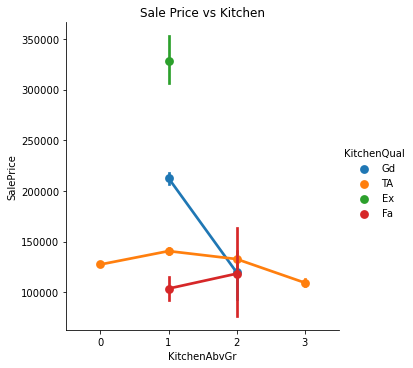

In [ ]:
# Kitchen Quality
sns.factorplot("KitchenAbvGr","SalePrice",data=raw_data,hue="KitchenQual")
plt.title("Sale Price vs Kitchen");

Having one Kitchen of Excellent quality hikes house price.

# 7.1 Correlation

In [ ]:
# Check Correlation
data_num.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
LotFrontage,1.000000,0.652386,0.205269,0.087589,0.059305,0.117652,0.067373,0.035608,0.102782,-0.006357,...,0.273091,0.317798,0.059865,0.133624,-0.021137,0.056284,0.044893,0.119599,0.028491,0.372916
LotArea,0.652386,1.000000,0.178220,0.021943,0.027672,0.070651,0.096966,0.084312,0.047510,-0.010681,...,0.272010,0.322048,0.122915,0.137754,-0.015186,0.055375,0.087518,0.097257,0.080298,0.427126
OverallQual,0.205269,0.178220,1.000000,0.572323,0.550684,0.413958,0.054199,-0.101469,0.268446,-0.029924,...,0.600671,0.562022,0.283256,0.445101,-0.158648,0.027546,0.049983,0.072651,-0.085131,0.678565
YearBuilt,0.087589,0.021943,0.572323,1.000000,0.592855,0.412631,0.151209,-0.068793,0.090576,-0.182266,...,0.537850,0.478954,0.307474,0.389065,-0.446694,0.028977,-0.059629,0.005805,-0.077819,0.366477
YearRemodAdd,0.059305,0.027672,0.550684,0.592855,1.000000,0.224771,0.012105,-0.102425,0.167086,-0.057486,...,0.420622,0.371600,0.285773,0.382743,-0.226996,0.052398,-0.039983,0.009025,-0.074574,0.362181
MasVnrArea,0.117652,0.070651,0.413958,0.412631,0.224771,1.000000,0.187145,-0.063123,0.093741,-0.108616,...,0.390094,0.371069,0.161452,0.209989,-0.186108,0.047022,0.037353,0.005346,-0.054501,0.382169
BsmtFinSF1,0.067373,0.096966,0.054199,0.151209,0.012105,0.187145,1.000000,0.185051,-0.265488,-0.063563,...,0.070302,0.117933,0.082144,0.015075,-0.127733,0.051775,0.073392,0.042147,0.018808,0.167094
BsmtFinSF2,0.035608,0.084312,-0.101469,-0.068793,-0.102425,-0.063123,0.185051,1.000000,-0.272666,0.006314,...,-0.053164,-0.018257,0.059134,-0.077644,0.038587,-0.022537,0.063879,0.068055,0.027978,0.019398
BsmtUnfSF,0.102782,0.047510,0.268446,0.090576,0.167086,0.093741,-0.265488,-0.272666,1.000000,0.001886,...,0.146919,0.113877,0.014448,0.182827,0.001014,0.004390,0.012820,-0.026761,-0.030640,0.377397
LowQualFinSF,-0.006357,-0.010681,-0.029924,-0.182266,-0.057486,-0.108616,-0.063563,0.006314,0.001886,1.000000,...,-0.094253,-0.071387,-0.037934,-0.000397,0.047332,0.016699,-0.014132,0.068662,0.025156,-0.022774


# 7.2 Correlation Plot

Text(0.5, 1.0, 'Correlation between features')

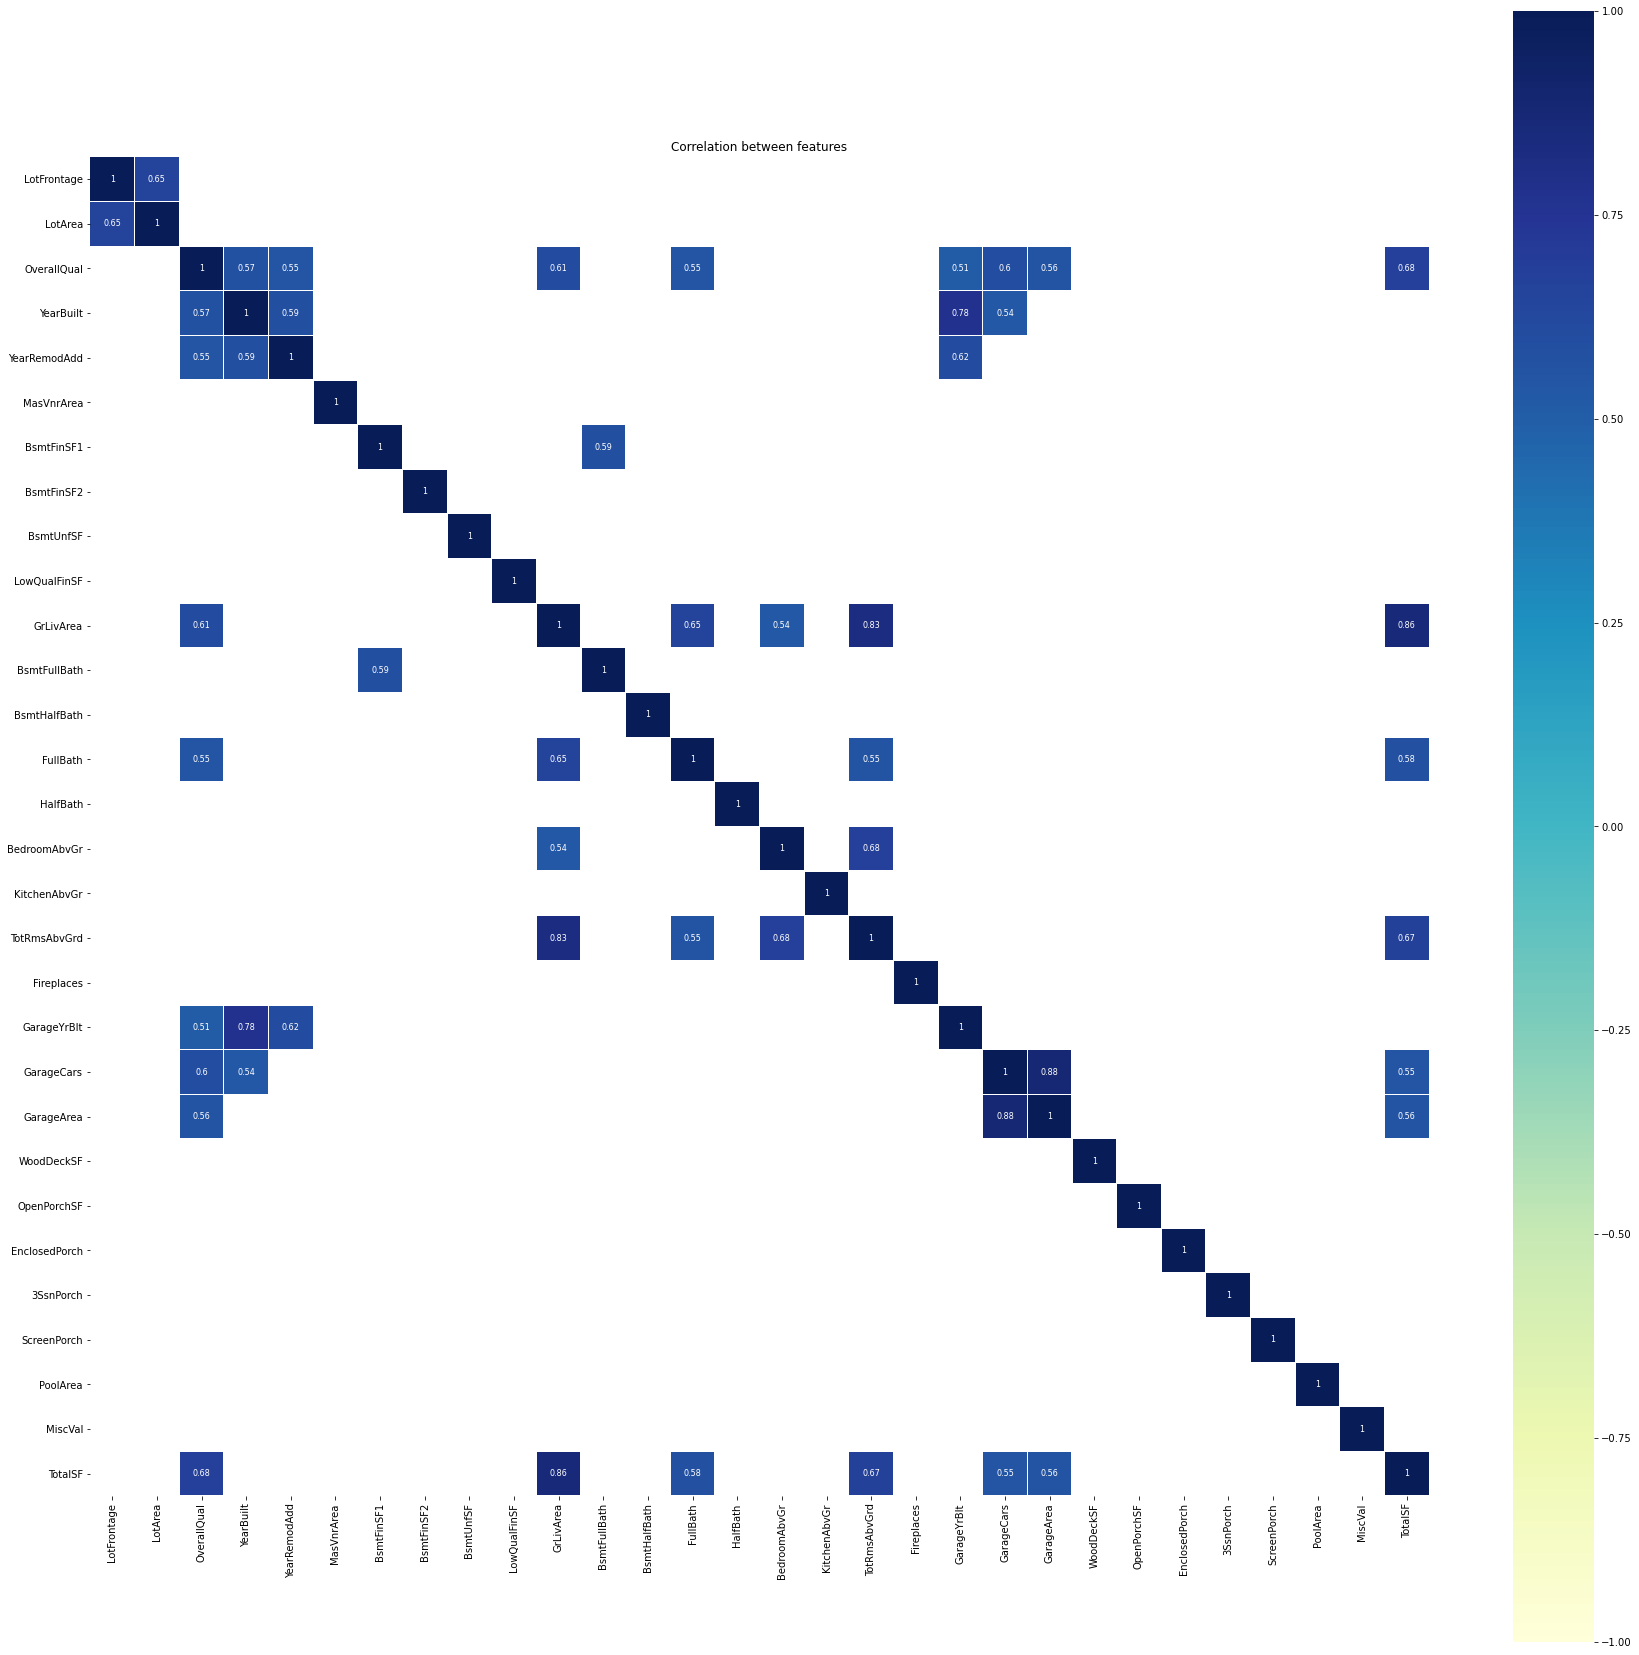

In [ ]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=data_num.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

As we can see above there are few features which show high multicollinearity from heatmap. Dark Blue squares on diagonal line has high multicollinearity 

# 8. Linear Regression Modeling

# 8.1 Preparation of Datasets
Split the dataset into Train & Test

In [ ]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.30, random_state=0)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_test  (438, 276)
y_train  (1022,)
y_test  (438,)


In [ ]:
x_train  

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,0.015568,0.006840,0.100076,0.186465,0.218904,0.572034,0.275153,-0.089825,0.015060,-0.015717,...,0,0,0,0,1,0,0,0,1,0
682,0.015568,-0.223669,-0.011035,0.179219,0.202237,-0.288945,0.310472,-0.089825,0.002327,-0.015717,...,0,0,0,0,1,0,0,0,1,0
960,-0.103554,-0.044634,-0.122146,-0.096144,0.385571,-0.288945,0.268223,-0.089825,-0.071504,-0.015717,...,0,0,0,0,1,0,0,0,1,0
1384,-0.036201,0.000150,-0.011035,-0.233825,-0.581096,-0.288945,0.126559,-0.089825,0.029569,-0.015717,...,0,0,0,0,1,0,0,0,1,0
1100,-0.036201,-0.014654,-0.455479,-0.371506,-0.581096,-0.288945,0.167111,-0.089825,-0.728201,-0.015717,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.079648,0.007985,0.211187,0.200958,0.235571,0.593800,0.327589,-0.089825,-0.148076,-0.015717,...,0,0,0,0,1,0,0,0,1,0
835,-0.036201,0.011482,-0.233257,-0.154115,0.168904,-0.288945,0.215759,-0.089825,0.101974,-0.015717,...,0,0,0,0,1,0,0,0,1,0
1216,0.010156,-0.002678,-0.011035,0.048784,-0.114429,-0.288945,-0.489636,-0.089825,-0.728201,-0.015717,...,0,0,0,0,1,0,0,0,1,0
559,0.015568,-0.203772,0.100076,0.229943,0.318904,0.110118,-0.489636,-0.089825,0.203417,-0.015717,...,0,0,0,0,1,0,0,0,1,0


# 8.2 Building a Linear Regression Base Model

In [ ]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, x_train).fit()
# Note the Swap of X and Y 

In [ ]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     65.93
Date:                Sat, 07 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:24:55   Log-Likelihood:                 1105.1
No. Observations:                1022   AIC:                            -1680.
Df Residuals:                     757   BIC:                            -374.0
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0851      0.051      1.656      0.098      -0.016       0.186
LotArea                   0.5269      0.079      6.655      0.000       0.371       0.682
OverallQual               0.3031      0.050      6.053      0.000       0.205       0.401
YearBuilt                 0.2539      0.065      3.888      0.000       0.126       0.382
YearRemodAdd              0.0491      0.019      2.613      0.009       0.012       0.086
MasVnrArea                0.0549      0.047      1.161      0.246      -0.038       0.148
BsmtFinSF1                0.0975      0.051      1.899      0.058      -0.003       0.198
BsmtFinSF2               -0.0001      0.077     -0.001      0.999      -0.151       0.150
BsmtUnfSF                -0.0355      0.026     -1.378      0.169      -0.086       0.015
LowQualFinSF              0.0102      0.040      0.257      0.797      -0.068       0.088
GrLivArea                 0.6069      0.179      3.383      0.001       0.255       0.959
BsmtFullBath              0.0870      0.031      2.832      0.005       0.027       0.147
BsmtHalfBath              0.0446      0.027      1.671      0.095      -0.008       0.097
FullBath                  0.1088      0.036      3.028      0.003       0.038       0.179
HalfBath                  0.0598      0.024      2.484      0.013       0.013       0.107
BedroomAbvGr             -0.0739      0.062     -1.199      0.231      -0.195       0.047
KitchenAbvGr             -0.1743      0.115     -1.513      0.131      -0.401       0.052
TotRmsAbvGrd              0.0416      0.059      0.701      0.484      -0.075       0.158
Fireplaces                0.0576      0.036      1.586      0.113      -0.014       0.129
GarageYrBlt              -0.0139      0.038     -0.369      0.712      -0.088       0.060
GarageCars                0.0163      0.052      0.316      0.752      -0.085       0.118
GarageArea                0.1902      0.063      3.018      0.003       0.066       0.314
WoodDeckSF                0.0395      0.010      3.821      0.000       0.019       0.060
OpenPorchSF               0.0078      0.013      0.617      0.538      -0.017       0.033
EnclosedPorch             0.0095      0.015      0.621      0.535      -0.021       0.040
3SsnPorch                -0.0038      0.034     -0.112      0.911      -0.070       0.062
ScreenPorch               0.0385      0.016      2.481      0.013       0.008       0.069
PoolArea                 -0.0219      0.164     -0.133      0.894      -0.344       0.301
MiscVal                   0.0422      0.092      0.460      0.645      -0.138       0.222
TotalSF                   0.9423      0.215      4.387      0.000       0.521       1.364
MSSubClass_160           -0.0668      0.058     -1.150      0.250      -0.181       0.047
MSSubClass_180         

In [ ]:
from IPython.display import Image

# Model Evaluation Metrics for Regression

Metrics can we used for regression problems are

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
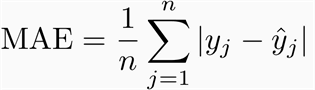

 
Mean Squared Error (MSE) is the mean of the squared errors:
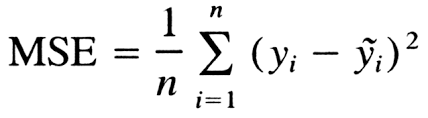
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
![](https://cdn-images-1.medium.com/max/1600/1*9hQVcasuwx5ddq_s3MFCyw.gif)



In [ ]:
def rmse(predictions, targets):

    differences = predictions - targets                       # the DIFFERENCEs.

    differences_squared = differences ** 2                    # the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^

    return rmse_val 

In [ ]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(x_test)

In [ ]:

tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(predictions1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.958319,0.943784,0.463055


# 8.3 Building Model with Constant

In [ ]:
df_constant = sm.add_constant(newdata)

In [ ]:
x_train1,x_test1, y_train1, y_test1 = train_test_split(df_constant, target_log, test_size = 0.30, random_state=0)

In [ ]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model2 = sm.OLS(y_train1, x_train1).fit()
# Note the Swap of X and Y 

In [ ]:
# Printing Linear Regression Summary
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.944     
Dependent Variable:   SalePrice        AIC:                -1680.2974
Date:                 2020-11-07 13:25 BIC:                -373.9755 
No. Observations:     1022             Log-Likelihood:     1105.1    
Df Model:             264              F-statistic:        65.93     
Df Residuals:         757              Prob (F-statistic): 0.00      
R-squared:            0.958            Scale:              0.0090913 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  9.2895   0.2045 45.4308 0.0000  8.8881  9.6910
LotFrontage            0.0851   0.0514  1.6559 0.0982 -0.0158  0.1860
LotArea                0.5269   0.0792  6.6549 0.0000  0.3715  0.6824
OverallQual            0.3031   0.0501  6.0531 0.0000  0.2048  0.4014
YearBuilt              0.2539   0.0653  3.8882 0.0001  0.1257  0.3820
YearRemodAdd           0.0491   0.0188  2.6128 0.0092  0.0122  0.0860
MasVnrArea             0.0549   0.0473  1.1609 0.2460 -0.0379  0.1478
BsmtFinSF1             0.0975   0.0514  1.8994 0.0579 -0.0033  0.1984
BsmtFinSF2            -0.0001   0.0767 -0.0013 0.9989 -0.1506  0.1504
BsmtUnfSF             -0.0355   0.0258 -1.3782 0.1685 -0.0861  0.0151
LowQualFinSF           0.0102   0.0398  0.2568 0.7974 -0.0679  0.0884
GrLivArea              0.6069   0.1794  3.3825 0.0008  0.2547  0.9591
BsmtFullBath           0.0870   0.0307  2.8315 0.0048  0.0267  0.1473
BsmtHalfBath           0.0446   0.0267  1.6712 0.0951 -0.0078  0.0969
FullBath               0.1088   0.0359  3.0285 0.0025  0.0383  0.1794
HalfBath               0.0598   0.0241  2.4843 0.0132  0.0126  0.1071
BedroomAbvGr          -0.0739   0.0617 -1.1985 0.2311 -0.1949  0.0471
KitchenAbvGr          -0.1743   0.1152 -1.5127 0.1308 -0.4005  0.0519
TotRmsAbvGrd           0.0416   0.0593  0.7007 0.4837 -0.0749  0.1580
Fireplaces             0.0576   0.0363  1.5863 0.1131 -0.0137  0.1289
GarageYrBlt           -0.0139   0.0377 -0.3687 0.7124 -0.0879  0.0601
GarageCars             0.0163   0.0516  0.3163 0.7519 -0.0850  0.1176
GarageArea             0.1902   0.0630  3.0180 0.0026  0.0665  0.3139
WoodDeckSF             0.0395   0.0103  3.8208 0.0001  0.0192  0.0597
OpenPorchSF            0.0078   0.0127  0.6166 0.5377 -0.0171  0.0327
EnclosedPorch          0.0095   0.0153  0.6211 0.5347 -0.0206  0.0396
3SsnPorch             -0.0038   0.0337 -0.1120 0.9109 -0.0699  0.0624
ScreenPorch            0.0385   0.0155  2.4806 0.0133  0.0080  0.0689
PoolArea              -0.0219   0.1643 -0.1331 0.8942 -0.3445  0.3007
MiscVal                0.0422   0.0915  0.4605 0.6453 -0.1376  0.2219
TotalSF                0.9423   0.2148  4.3865 0.0000  0.5206  1.3641
MSSubClass_160        -0.0668   0.0581 -1.1503 0.2504 -0.1808  0.0472
MSSubClass_180         0.0586   0.0788  0.7434 0.4575 -0.0961  0.2133
MSSubClass_190        -0.0261   0.1541 -0.1691 0.8658 -0.3286  0.2764
MSSubClass_20         -0.0470   0.0677 -0.6938 0.4880 -0.1798  0.0859
MSSubClass_30         -0.0968   0.0719 -1.3457 0.1788 -0.2380  0.0444
MSSubClass_40          0.0257   0.1190  0.2162 0.8289 -0.2079  0.2594
MSSubClass_45         -0.5774   0.1738 -3.3219 0.0009 -0.9186 -0.2362
MSSubClass_50         -0.0921   0.0876 -1.0515 0.2934 -0.2641  0.0799
MSSubClass_60         -0.0706   0.0834 -0.8466 0.3975 -0.2343  0.0931
MSSubClass_70         -0.0424   0.0845 -0.5020 0.6158 -0.2084  0.1235
MSSubClass_75         -0.1085   0.1130 -0.9608 0.3369 -0.3303  0.1132
MSSubClass_80         -0.0823   0.1014 -0.8115 0.4173 -0.2815  0.1168
MSSubClass_85         -0.0196   0.0928 -0.2109 0.8330 -0.2017  0.1626
MSSubClass_90         -0.0400   0.0400 -0.9995 0.3

In [ ]:
# Predicting the model on test data
predictions2 = model2.predict(x_test1)

tmp2 = pd.Series({'Model': " Linear Regression Model with Constant",
                 'R-Squared Value' : model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE': rmse(predictions2, y_test1)})

model2_report = models_report.append(tmp2, ignore_index = True)
model2_report

# Multicollinearity
In regression, "multicollinearity" refers to predictors that are correlated with other predictors.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other.
![](https://www.displayr.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-06-at-10.32.14-am.png)
A rule of thumb for interpreting the variance inflation factor:

* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated.

## 8.4 Calculating Variance Inflation Factor(VIF)

In [ ]:
print ("\nVariance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar],(x_train1[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
const 0.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


LotFrontage 3.914
LotArea 7.103
OverallQual 6.411
YearBuilt 22.992
YearRemodAdd 4.634
MasVnrArea 31.83
BsmtFinSF1 35.571
BsmtFinSF2 43.937
BsmtUnfSF 4.085
LowQualFinSF 2.479
GrLivArea 50.109
BsmtFullBath 3.123
BsmtHalfBath 1.721
FullBath 4.728
HalfBath 4.044
BedroomAbvGr 4.303
KitchenAbvGr 6.224
TotRmsAbvGrd 7.163
Fireplaces 6.648
GarageYrBlt 7.796
GarageCars 10.064
GarageArea 9.67
WoodDeckSF 1.783
OpenPorchSF 2.118
EnclosedPorch 2.074
3SsnPorch 1.451
ScreenPorch 1.459
PoolArea 8.349
MiscVal 18.017
TotalSF 38.964
MSSubClass_160 16.977
MSSubClass_180 2.721
MSSubClass_190 53.722
MSSubClass_20 119.855
MSSubClass_30 25.517
MSSubClass_40 4.661
MSSubClass_45 36.156
MSSubClass_50 75.463
MSSubClass_60 129.837
MSSubClass_70 33.816
MSSubClass_75 13.901
MSSubClass_80 39.317
MSSubClass_85 12.157
MSSubClass_90 inf
MSZoning_FV 17.047


<ipython-input-59-14d28309fa5b>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1-res.rsquared)


MSZoning_RH 5.883
MSZoning_RL 54.608
MSZoning_RM 35.547
Street_Pave 2.078
Alley_Pave 2.55
LotShape_IR2 1.538
LotShape_IR3 1.541
LotShape_Reg 1.884
LandContour_HLS 2.816
LandContour_Low 3.658
LandContour_Lvl 4.557
Utilities_NoSeWa 2.085
LotConfig_CulDSac 2.128
LotConfig_FR2 1.465
LotConfig_FR3 2.505
LotConfig_Inside 2.067
LandSlope_Mod 2.348
LandSlope_Sev 3.12
Neighborhood_Blueste 1.863
Neighborhood_BrDale 4.644
Neighborhood_BrkSide 12.856
Neighborhood_ClearCr 6.767
Neighborhood_CollgCr 17.84
Neighborhood_Crawfor 9.435
Neighborhood_Edwards 15.513
Neighborhood_Gilbert 10.457
Neighborhood_IDOTRR 10.314
Neighborhood_MeadowV 5.518
Neighborhood_Mitchel 8.61
Neighborhood_NAmes 29.121
Neighborhood_NPkVill 3.42
Neighborhood_NWAmes 11.308
Neighborhood_NoRidge 6.939
Neighborhood_NridgHt 9.958
Neighborhood_OldTown 23.272
Neighborhood_SWISU 5.716
Neighborhood_Sawyer 13.545
Neighborhood_SawyerW 9.295
Neighborhood_Somerst 13.828
Neighborhood_StoneBr 3.952
Neighborhood_Timber 6.689
Neighborhood_Veenke

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_RRAe 7.558
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_2fmCon 40.387
BldgType_Duplex inf
BldgType_Twnhs 16.377
BldgType_TwnhsE 37.678
HouseStyle_1.5Unf 35.324
HouseStyle_1Story 80.183
HouseStyle_2.5Fin 4.486
HouseStyle_2.5Unf 7.005
HouseStyle_2Story 54.729
HouseStyle_SFoyer 12.368
HouseStyle_SLvl 25.801
OverallCond_2 inf
OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gable 134.739
RoofStyle_Gambrel 7.833
RoofStyle_Hip 124.374
RoofStyle_Mansard 6.385
RoofStyle_Shed 7.202
RoofMatl_CompShg inf
RoofMatl_Membran nan
RoofMatl_Metal inf
RoofMatl_Roll inf
RoofMatl_Tar&Grv inf
RoofMatl_WdShake inf
RoofMatl_WdShngl inf
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.923
Exterior1st_BrkFace 21.465
Exterior1st_CBlock inf
Exterior1st_CemntBd 47.452
Exterior1st_HdBoard 84.622
Exterior1st_ImStucc 1.894
Exterior1st_MetalSd 111.592
Exterior1st_Plywood 51.072
Exterior1st_Stone 3.344
Exterior1st_Stucco 

Removing variable has  threshold value of VIF above 100 

#### Removing variable having VIF above 100


In [ ]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable',
           'RoofStyle_Hip','RoofMatl_CompShg','Exterior1st_MetalSd',
           'Exterior1st_VinylSd','Exterior2nd_VinylSd',
           'GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_train1 if x not in vif_100]
# print(to_keep)
x_train2 = x_train1[to_keep]
x_train2.head()

,const,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,1.0,0.015568,0.006840,0.100076,0.186465,0.218904,0.572034,0.275153,-0.089825,0.015060,...,0,0,0,0,1,0,0,0,1,0
682,1.0,0.015568,-0.223669,-0.011035,0.179219,0.202237,-0.288945,0.310472,-0.089825,0.002327,...,0,0,0,0,1,0,0,0,1,0
960,1.0,-0.103554,-0.044634,-0.122146,-0.096144,0.385571,-0.288945,0.268223,-0.089825,-0.071504,...,0,0,0,0,1,0,0,0,1,0
1384,1.0,-0.036201,0.000150,-0.011035,-0.233825,-0.581096,-0.288945,0.126559,-0.089825,0.029569,...,0,0,0,0,1,0,0,0,1,0
1100,1.0,-0.036201,-0.014654,-0.455479,-0.371506,-0.581096,-0.288945,0.167111,-0.089825,-0.728201,...,0,0,0,0,1,0,0,0,1,0


### 8.4.1 Building Model after removing VIF above 100

In [ ]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model3 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     67.52
Date:                Sat, 07 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:25:32   Log-Likelihood:                 1094.1
No. Observations:                1022   AIC:                            -1676.
Df Residuals:                     766   BIC:                            -414.2
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.6308      0.212     50.183      0.000      10.215      11.047
LotFrontage               0.1054      0.051      2.058      0.040       0.005       0.206
LotArea                   0.5015      0.076      6.605      0.000       0.352       0.651
OverallQual               0.3185      0.050      6.423      0.000       0.221       0.416
YearBuilt                 0.2372      0.065      3.674      0.000       0.110       0.364
YearRemodAdd              0.0488      0.019      2.631      0.009       0.012       0.085
MasVnrArea                0.0647      0.047      1.371      0.171      -0.028       0.157
BsmtFinSF1                0.1082      0.051      2.112      0.035       0.008       0.209
BsmtFinSF2               -0.0099      0.076     -0.130      0.896      -0.160       0.140
BsmtUnfSF                -0.0379      0.026     -1.467      0.143      -0.089       0.013
LowQualFinSF              0.0274      0.040      0.692      0.489      -0.050       0.105
GrLivArea                 0.6121      0.179      3.419      0.001       0.261       0.964
BsmtFullBath              0.0868      0.031      2.833      0.005       0.027       0.147
BsmtHalfBath              0.0416      0.027      1.565      0.118      -0.011       0.094
FullBath                  0.1026      0.036      2.853      0.004       0.032       0.173
HalfBath                  0.0567      0.024      2.395      0.017       0.010       0.103
BedroomAbvGr             -0.0821      0.061     -1.336      0.182      -0.203       0.039
KitchenAbvGr             -0.1682      0.112     -1.500      0.134      -0.388       0.052
TotRmsAbvGrd              0.0688      0.059      1.164      0.245      -0.047       0.185
Fireplaces                0.0489      0.036      1.350      0.177      -0.022       0.120
GarageYrBlt               0.0065      0.037      0.177      0.860      -0.065       0.078
GarageCars                0.0117      0.051      0.229      0.819      -0.089       0.112
GarageArea                0.1443      0.061      2.350      0.019       0.024       0.265
WoodDeckSF                0.0363      0.010      3.520      0.000       0.016       0.056
OpenPorchSF               0.0078      0.013      0.617      0.537      -0.017       0.033
EnclosedPorch             0.0093      0.015      0.612      0.541      -0.021       0.039
3SsnPorch                -0.0103      0.034     -0.304      0.761      -0.076       0.056
ScreenPorch               0.0455      0.015      2.961      0.003       0.015       0.076
PoolArea                 -0.0894      0.161     -0.554      0.580      -0.406       0.227
MiscVal                   0.0483      0.092      0.528      0.598      -0.131       0.228
TotalSF                   0.9516      0.215      4.421      0.000       0.529       1.374
MSSubClass_160         

In [ ]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMatl_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_test1 if x not in vif_100]
# print(to_keep)
x_test2 = x_test1[to_keep]
x_test2.head()

In [ ]:
predictions3 = model3.predict(x_test2)

tmp3 = pd.Series({'Model': " LRM after removing VIF above 100",
                 'R-Squared Value' : model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(predictions3, y_test1)})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

#### Checking variable having VIF above 10

In [ ]:
# Removing variable has threshold value of VIF above 10
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))

### Below are the variable having above 10 VIF threshold

In [ ]:
VIF_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep = [x for x in x_train2 if x not in VIF_10]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

### 8.4.2 Building Model after removing VIF above 10

In [ ]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model4 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model4.summary()

In [ ]:
VIF_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep = [x for x in x_test2 if x not in VIF_10]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

In [ ]:
predictions4 = model4.predict(x_test2)
tmp4 = pd.Series({'Model': " LRM after removing VIF above 10",
                 'R-Squared Value' : model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj,
                 'RMSE': rmse(predictions4, y_test1)})

model4_report = models_report.append(tmp4, ignore_index = True)
model4_report

# Checking variable having VIF above 5

In [ ]:
# Removing variable has threshold value of VIF above 5
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))

# Below are the variable having above 5 VIF threshold

In [ ]:
VIF_5 = ['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
         'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd' ,'Condition1_Norm','MoSold_6','MoSold_7']
to_keep = [x for x in x_train2 if x not in VIF_5]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

### 8.4.3 Building Model after removing VIF above 5

In [ ]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model5 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model5.summary()

In [ ]:
VIF_5 = ['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
         'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd' ,'Condition1_Norm','MoSold_6','MoSold_7']
to_keep = [x for x in x_test2 if x not in VIF_5]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

In [ ]:
predictions5 = model5.predict(x_test2)
tmp5 = pd.Series({'Model': "LRM after removing VIF above 5",
                 'R-Squared Value' : model5.rsquared,
                 'Adj.R-Squared Value': model5.rsquared_adj,
                 'RMSE': rmse(predictions5, y_test1)})

model5_report = models_report.append(tmp5, ignore_index = True)
model5_report

# 8.5 Removing Variable based on  Insignificant Variables using P-value


In [ ]:
X = x_train2
Y = y_train1

In [ ]:
def feature_selection(X, Y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = feature_selection(X, Y)

print('resulting features:')
print(result)

In [ ]:
df_train= x_train2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_test= x_test2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_train.isna().sum().sum(), df_test.isna().sum().sum()

### 8.5.1 Building Model after removing insignificant variables using p-value

In [ ]:
# Building Linear Regression model using OLS 

model6 = sm.OLS(y_train1,df_train).fit()
# Note the Swap of X and Y 
model6.summary()

In [ ]:
# prediction on test data
predictions6  = model6.predict(df_test)

tmp6 = pd.Series({'Model': " LRM after removing Insignificant Variables",
                 'R-Squared Value' : model6.rsquared,
                 'Adj.R-Squared Value': model6.rsquared_adj,
                 'RMSE': rmse(predictions6, y_test1)})

model6_report = models_report.append(tmp6, ignore_index = True)
model6_report

## Multiplicative Interactions
“*” will also include the individual columns that were multiplied together
#### For Example
("y ~ a * b" , data = df) you'll have 3 independent variables which is the results of "a" multiply by "b" + "a" itself + "b" itself

In [ ]:
target = pd.DataFrame(y_train1,columns=['SalePrice'])
data = pd.concat([x_train2, target], axis=1)

# Building Linear Regression model using OLS 
import statsmodels.formula.api as smf
interaction = smf.ols(formula= 'SalePrice ~ OverallQual * YearRemodAdd *  BsmtFullBath', data = data).fit()
# Note the Swap of X and Y 
interaction.summary()

# Diagnostic Plot

## 1. Residual plot

A scatterplot of fitted values against residuals, with a “locally weighted scatterplot smoothing (lowess)” regression line showing any apparent trend.

This one can be easily plotted using seaborn residplot with fitted values as x parameter, and the dependent variable as y. lowess=True makes sure the lowess regression line is drawn. Additional parameters are passed to underlying matplotlib scatter and line functions using scatter_kws and line_kws, also titles and labels are set using matplotlib methods.

In [ ]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = model6.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'SalePrice', data=data, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

## 2. QQ Plot
This plot shows if residuals are normally distributed.This plots the standardized (z-score) residuals against the theoretical normal quantiles. Anything quite off the diagonal lines may be a concern for further investigation.

In [ ]:
res = model6.resid
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');
plt.show() 

## 3. Scale-Location Plot
This is another residual plot, showing their spread, which you can use to assess heteroscedasticity.

It’s essentially a scatter plot of absolute square-rooted normalized residuals and fitted values, with a lowess regression line.

In [ ]:
# normalized residuals
model_norm_residuals = model6.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

## 4. Leverage plot
This plot shows if any outliers have influence over the regression fit. Anything outside the group and outside “Cook’s Distance” lines, may have an influential effect on model fit.

In [ ]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

# cook's distance, from statsmodels internals
model_cooks = model6.get_influence().cooks_distance[0]

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

In [ ]:
# Comparison of various model
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
clas_model = pd.DataFrame(columns = cols)
clas_model = clas_model.append([model1_report,model2_report,model3_report,model4_report,model5_report,model6_report])
clas_model

Occam’s Razor principles can be stated as “when presented with competing hypothetical answers to a problem, one should select the one that makes the fewest assumptions”. According to Occam's Razor principle we consider Linear Regression Model after removing insignificant variables with 0.88 R-Squared value and RMSE of 0.1784 to make the model perform better with new data as well.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x,y)